In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
with open('results.json') as json_data:
    results= json.load(json_data)
    json_data.close()

In [4]:
dimensions = np.array(results["dimensions"])
Delta_gt = results["Delta_gt"]
sigma_gt = results["sigma_gt"]


In [5]:
def compute_mse(model_key, param_key):
    gt = Delta_gt if param_key == "Delta" else sigma_gt
    return [
        np.mean(np.sum((np.array(results[model_key][str(d)][param_key]) - np.array(gt[i]))**2)) 
        for i, d in enumerate(dimensions)
    ]

In [ ]:
Delta_errors_VB = compute_mse("VB", "Delta") 
Delta_errors_HVAE1 = compute_mse("HVAE1", "Delta")
Delta_errors_HVAE10 = compute_mse("HVAE10", "Delta")
Delta_errors_IWHVAE = compute_mse("IWHVAE", "Delta")

sigma_errors_VB = compute_mse("VB", "sigma") 
sigma_errors_HVAE1 = compute_mse("HVAE1", "sigma")
sigma_errors_HVAE10 = compute_mse("HVAE10", "sigma")
sigma_errors_IWHVAE = compute_mse("IWHVAE", "sigma")



theta_errors_VB = [Delta_errors_VB[i] + sigma_errors_VB[i] for i in range(len(dimensions))]
theta_errors_HVAE1 = [Delta_errors_HVAE1[i] + sigma_errors_HVAE1[i] for i in range(len(dimensions))]
theta_errors_HVAE10 = [Delta_errors_HVAE10[i] + sigma_errors_HVAE10[i] for i in range(len(dimensions))]
theta_errors_IWHVAE = [Delta_errors_IWHVAE[i] + sigma_errors_IWHVAE[i] for i in range(len(dimensions))]

Text(0.5, 1.0, 'Evolution of the MSE on $\\theta$')

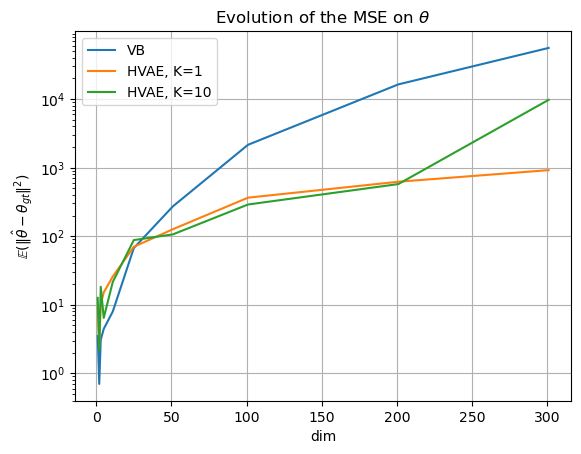

In [ ]:
fig, ax = plt.subplots()
ax.plot(dimensions, theta_errors_VB, label = "VB")
ax.plot(dimensions, theta_errors_HVAE1, label = "HVAE, K=1")
ax.plot(dimensions, theta_errors_HVAE10, label = "HVAE, K=10")
ax.plot(dimensions, theta_errors_IWHVAE, label = "IWHVAE, K=1, L=10")
ax.set_yscale("log")
ax.grid()
ax.legend()
ax.set_xlabel("dim")
ax.set_ylabel(r"$\mathbb{E}(\|\hat{\theta} - \theta_{gt}\|^2)$")
ax.set_title(r"Evolution of the MSE on $\theta$")

Text(0.5, 1.0, 'Evolution of the MSE on $\\Delta$')

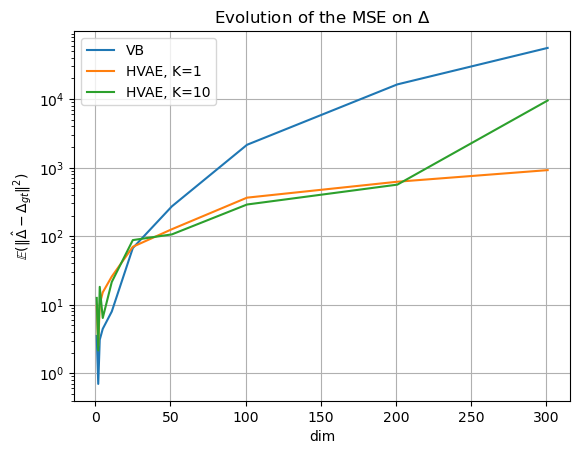

In [ ]:
fig, ax = plt.subplots()
ax.plot(dimensions, Delta_errors_VB, label = "VB")
ax.plot(dimensions, Delta_errors_HVAE1, label = "HVAE, K=1")
ax.plot(dimensions, Delta_errors_HVAE10, label = "HVAE, K=10")
ax.plot(dimensions, Delta_errors_IWHVAE, label = "IWHVAE, K=1, L=10")
ax.set_yscale("log")
ax.grid()
ax.legend()
ax.set_xlabel("dim")
ax.set_ylabel(r"$\mathbb{E}(\|\hat{\Delta} - \Delta_{gt}\|^2)$")
ax.set_title(r"Evolution of the MSE on $\Delta$")

Text(0.5, 1.0, 'Evolution of the MSE on $\\Sigma$')

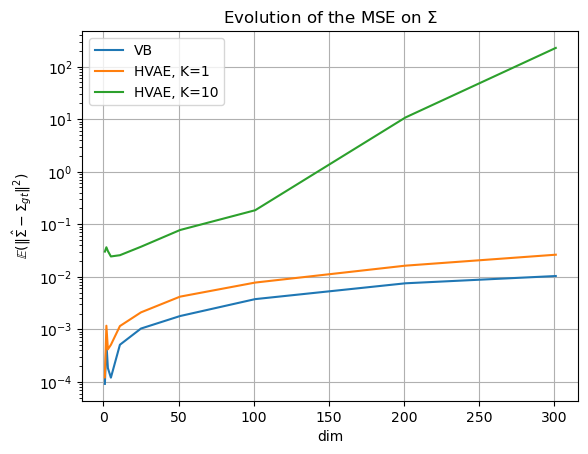

In [ ]:
fig, ax = plt.subplots()
ax.plot(dimensions, sigma_errors_VB, label = "VB")
ax.plot(dimensions, sigma_errors_HVAE1, label = "HVAE, K=1")
ax.plot(dimensions, sigma_errors_HVAE10, label = "HVAE, K=10")
ax.plot(dimensions, sigma_errors_IWHVAE, label = "IWHVAE, K=1, L=10")
ax.set_yscale("log")
ax.grid()
ax.legend()
ax.set_xlabel("dim")
ax.set_ylabel(r"$\mathbb{E}(\|\hat{\Sigma} - \Sigma_{gt}\|^2)$")
ax.set_title(r"Evolution of the MSE on $\Sigma$")